# **Principal Component Analysis (PCA)**:  
PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining as much variance as possible.

- **Identifies Variance**: PCA identifies the directions (principal components) in which the data varies the most.  
In the context of PCA, high variance often correlates with important patterns or information in the dataset, while low variance may correspond to noise or redundant information.
- **Feature Transformation**: It transforms the original features into new, uncorrelated features (principal components).  
- **Ordered Components**: Principal components are ordered by the amount of variance they explain.  
- **Dimensionality Reduction**: Reduces the number of features while preserving the essential patterns in the data.  
- **Linear Combinations**: Each principal component is a linear combination of the original features.  
- **Uncorrelated Axes**: Ensures the new axes (components) are orthogonal (uncorrelated).  
- **Preprocessing**: Often requires standardization of the data to ensure all features contribute equally to the analysis.  
- **Improves Efficiency**: Simplifies data for visualization or model training while avoiding overfitting in high-dimensional spaces.  

This method is widely used for exploratory data analysis, feature extraction, and preparing data for machine learning tasks.

**Variance** in PCA is a proxy for "information":

PCA assumes that higher variance in data corresponds to important information or meaningful patterns.
Dimensions with low variance are often considered to represent noise or redundant information because they contribute little to distinguishing between data points.
Hence, by focusing on variance, PCA automatically emphasizes the directions that are more likely to contain important patterns.
Variance is a quantifiable metric—it’s a mathematical way of measuring the spread of the data along a particular dimension. By focusing on variance, PCA provides a consistent, objective criterion for deciding what’s important.

*In the context of PCA, variance refers to:*

How much the data spreads out (or varies) along a particular direction (principal component).
The directions (or axes) with high variance explain more of the differences among the data points, which PCA interprets as containing more useful information.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [5]:
type(cancer)

sklearn.utils._bunch.Bunch

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
# Dataset id roughly small, however the number of attribute are quite large
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [15]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [17]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# Actual Target
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [31]:
scaled_data = scaler.transform(df)

### Steps for Implementing PCA in Python

1. **Instantiate a PCA Object**:  
   Begin by creating a PCA object from the `sklearn.decomposition` module. This step sets up the PCA model.

2. **Fit the PCA Model to the Data**:  
   Use the `.fit()` method on your dataset to compute the principal components. This step identifies the directions of maximum variance in the data.

3. **Apply Rotation and Dimensionality Reduction**:  
   Call the `.transform()` method to project your original data onto the principal components. This reduces the dimensionality while retaining as much variance as possible.

4. **Specify the Number of Components to Retain**:  
   When creating the PCA object, you can specify the desired number of principal components using the `n_components` parameter. This allows you to control how much variance is preserved in the reduced data.

By following these steps, you can effectively implement PCA to analyze and reduce the dimensionality.

In [35]:
# Instantiate a PCA object
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [41]:
pca.fit(scaled_data)

PCA(n_components=2)

In [45]:
x_pca = pca.transform(scaled_data)

In [47]:
scaled_data.shape

(569, 30)

In [49]:
x_pca.shape

(569, 2)

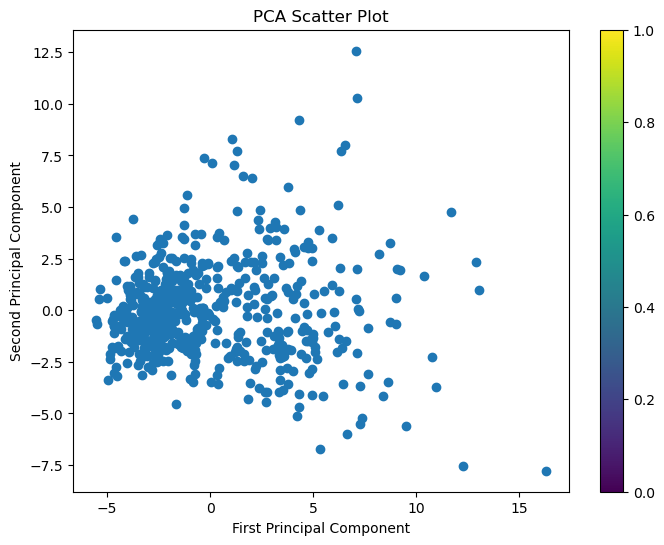

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.colorbar()  # Adds a colorbar for better interpretation of the target classes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()


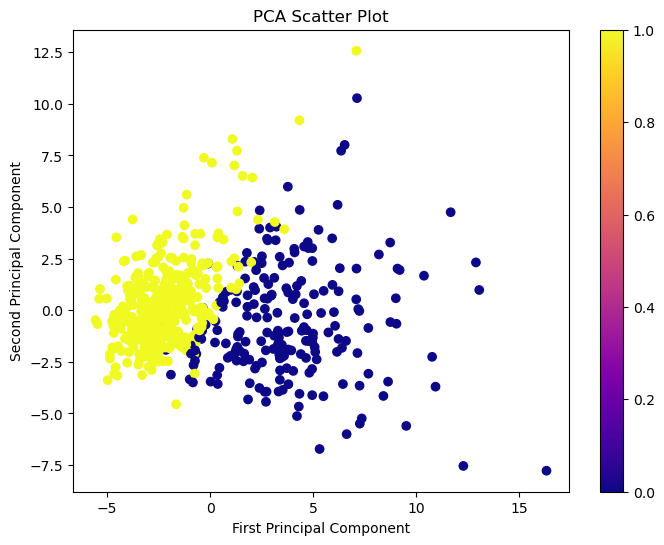

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.colorbar()  # Adds a colorbar for better interpretation of the target classes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()

## Interpreting the components 

In [60]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [62]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [64]:
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


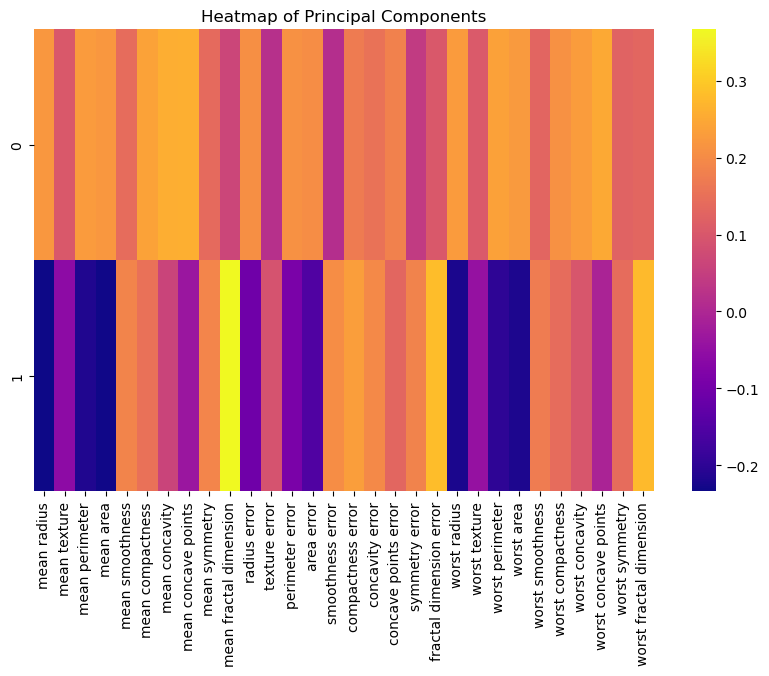

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(df_comp, cmap='plasma', annot=False, fmt=".2f", cbar=True)  # Adds annotation and color bar
plt.title('Heatmap of Principal Components')  # Optional: Adds a title
# plt.xlabel('Principal Components')  # Label for x-axis
# plt.ylabel('Features')  # Label for y-axis
plt.show()  # Displays the plot

In [90]:
from sklearn.decomposition import PCA

In [92]:
pca=PCA(n_components=3)

In [94]:
pca.fit(scaled_data)

PCA(n_components=3)

In [96]:
x_pca_three=pca.transform(scaled_data)

In [98]:
scaled_data.shape

(569, 30)

In [100]:
x_pca_three.shape

(569, 3)

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


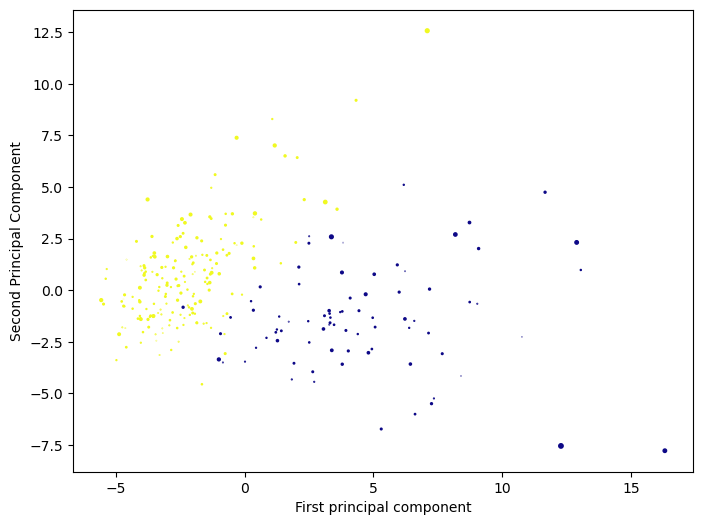

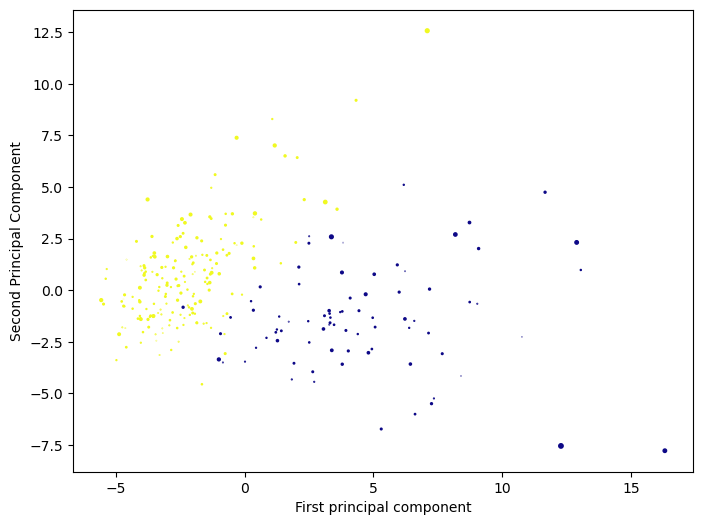

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca_three[:,0],x_pca_three[:,1],x_pca_three[:,2],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

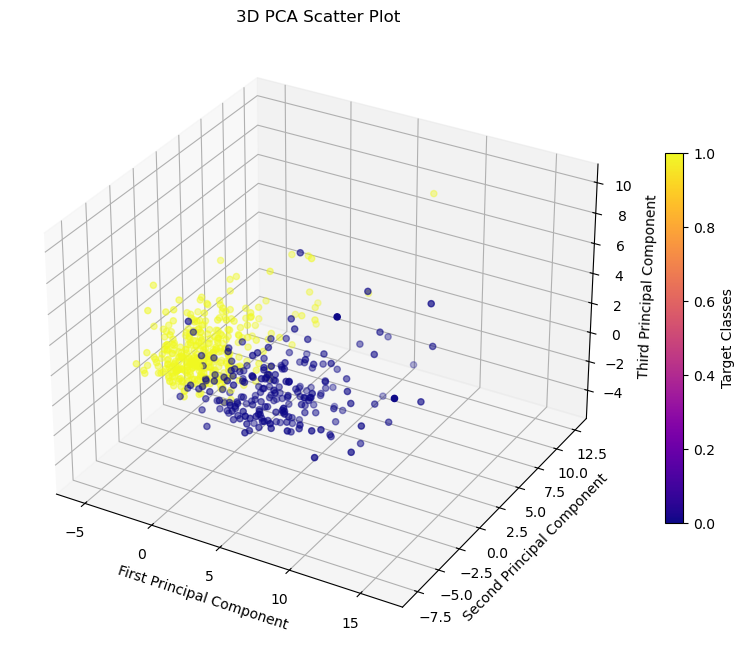

In [124]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the three principal components
sc = ax.scatter(x_pca_three[:, 0], x_pca_three[:, 1], x_pca_three[:, 2], 
                c=cancer['target'], cmap='plasma')

# Add labels for the axes
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# Add a title
ax.set_title('3D PCA Scatter Plot')

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label('Target Classes')

# Display the plot
plt.show()

In [112]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919 ,
        -0.07409157,  0.00273384, -0.02556354, -0

In [114]:
df_comp_three = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [116]:
df_comp_three.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791


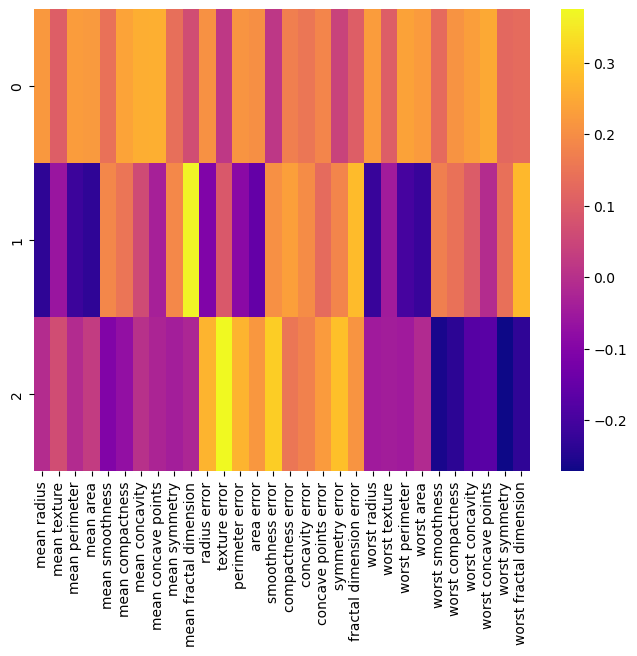

In [122]:
plt.figure(figsize=(8,6))
sns.heatmap(df_comp_three,cmap='plasma',)
plt.show()

## A straightforward example of PCA implementation

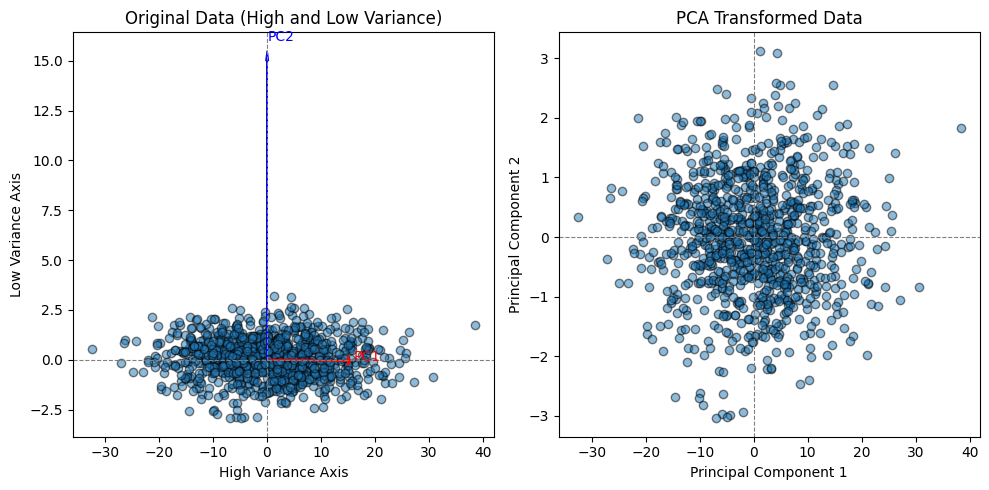

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Step 1: Generate synthetic data
np.random.seed(42)

# High variance component
x = np.random.normal(0, 10, 1000)

# Low variance component
y = np.random.normal(0, 1, 1000)

# Combine into 2D data
data = np.column_stack((x, y))

# Step 2: Visualize the original data
plt.figure(figsize=(10, 5))

# Plot the data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, edgecolor='k')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title("Original Data (High and Low Variance)")
plt.xlabel("High Variance Axis")
plt.ylabel("Low Variance Axis")

# Step 3: Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Step 4: Visualize principal components
components = pca.components_  # PCA directions

# Overlay PCA components
for i, component in enumerate(components):
    plt.arrow(0, 0, component[0] * 15, component[1] * 15,
              head_width=0.5, head_length=0.5, color='red' if i == 0 else 'blue')
    plt.text(component[0] * 16, component[1] * 16,
             f"PC{i+1}", color='red' if i == 0 else 'blue')

# Step 5: Visualize transformed data
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5, edgecolor='k')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title("PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()
